<a href="https://colab.research.google.com/github/Patojukarthikeya73/Infosys_Springboard/blob/main/final_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Setup Environment
!pip install transformers torch matplotlib ipywidgets radon --quiet
!jupyter nbextension enable --py widgetsnbextension



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
# Step 2: Hugging Face Authentication
from getpass import getpass

HF_TOKEN = getpass("Colab ")


Colab ··········


In [1]:
# Step 3: Select Code Generation Models
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

models = {
    "DeepSeek": "deepseek-ai/deepseek-coder-1.3b-instruct",  # works only if enough VRAM
    "Phi-2": "microsoft/phi-2",
    "Gemma": "google/gemma-2b-it",  # may require HF Inference API
    "Stable-Code": "stabilityai/stable-code-3b",
    "Replit-Code": "Salesforce/codegen-350M-multi"  # safe for Free Colab
}



In [ ]:
# Function to safely load a model
def load_model(model_name, model_id):
    print(f"Loading {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_id, use_auth_token=HF_TOKEN)
    try:
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.float16,
            device_map="auto",
            use_auth_token=HF_TOKEN
        )
    except RuntimeError as e:
        print(f"⚠️ Could not load {model_name}: {e}")
        model = None
    return tokenizer, model



In [ ]:
# Step 5: Code Generation Pipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

model_name = "Salesforce/codegen-350M-mono"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

prompt = "Write a Python function to calculate factorial recursively."

output = generator(
    prompt,
    max_new_tokens=150,
    pad_token_id=tokenizer.eos_token_id
)

print(output[0]['generated_text'])


tokenizer_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/797M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/797M [00:00<?, ?B/s]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Write a Python function to calculate factorial recursively.

This program will take a user-input as an integer x, and calculate factorial recusively from this number, using recurrence rules of mathematics.

The recursion works in two different ways.
(1) It supports loops. The outer loop is limited to looping up to the value of the passed argument. The inner loop is limited to the recursion of the outer loop till the the value of the argument or value of the outer loop is reached.
(2) It only allows to use loop boundaries within the while loop.

# For this project you use following recursion:

a = 0 # initial value
x = int(input("Please enter an integer (or 'q'


In [ ]:
# Metrics Complexity

import re
from radon.complexity import cc_visit
from radon.metrics import mi_visit
from radon.raw import analyze

generated_output = output[0]['generated_text']

# Loosened pattern for detecting Python-looking code blocks
code_pattern = re.findall(r"(def .*?:|class .*?:|import .*|from .*|if .*:|for .*:|while .*:|try:|except.*:|return .*)", generated_output)

python_code = "\n".join(code_pattern)

if not python_code.strip():
    print("⚠️ No valid Python code detected. Try refining your model prompt.")
else:
    print("----- Extracted Python Code -----")
    print(python_code)

    # Metrics
    try:
        cc = cc_visit(python_code)
        print("\nCyclomatic Complexity per function/class:")
        for item in cc:
            print(f"{item.name}: {item.complexity}")
    except Exception as e:
        print("Error computing Cyclomatic Complexity:", e)

    try:
        mi = mi_visit(python_code, True)
        print(f"\nMaintainability Index: {mi}")
    except Exception as e:
        print("Error computing Maintainability Index:", e)

    try:
        raw_metrics = analyze(python_code)
        print(f"\nLines of Code (LOC): {raw_metrics.loc}")
    except Exception as e:
        print("Error computing LOC:", e)


----- Extracted Python Code -----
from this number, using recurrence rules of mathematics.
Error computing Cyclomatic Complexity: invalid syntax (<unknown>, line 1)
Error computing Maintainability Index: invalid syntax (<unknown>, line 1)

Lines of Code (LOC): 1


In [ ]:
# First  Interactive UI

!pip install transformers ipywidgets matplotlib accelerate --quiet

from transformers import pipeline
import matplotlib.pyplot as plt
import re
import torch

# 💡 Load lightweight model safely
device = 0 if torch.cuda.is_available() else -1
generator = pipeline(
    "text-generation",
    model="Salesforce/codegen-350M-mono",
    tokenizer="Salesforce/codegen-350M-mono",
    device=device
)

# 🔹 10 sample code prompts
prompts = [
    "Write a Python program to add 5 and 4",
    "Write a Python function to check if a number is prime",
    "Write a Python code to reverse a string",
    "Write a Python program to calculate factorial using recursion",
    "Write a Python script to sort a list of numbers",
    "Write a Python function to count vowels in a string",
    "Write a Python code to find the maximum number in a list",
    "Write a Python function to check if a string is a palindrome",
    "Write a Python code to calculate area of a circle given radius",
    "Write a Python function to convert Celsius to Fahrenheit"
]

# 🔹 Helper to generate + score code
def generate_code(prompt):
    result = generator(f"Write only Python code for: {prompt}", max_new_tokens=150, temperature=0.3)
    text = result[0]["generated_text"]

    # Clean and validate
    clean = re.sub(r"```python|```", "", text).strip()
    score = 1 if re.search(r"(def |print|for |if |import )", clean) else 0
    return clean, score

scores = []
for i, p in enumerate(prompts):
    code, score = generate_code(p)
    print(f"\nPrompt {i+1}: {p}\n{'-'*60}\n{code}\n")
    scores.append(score)

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e


Prompt 1: Write a Python program to add 5 and 4
------------------------------------------------------------
Write only Python code for: Write a Python program to add 5 and 4 to a list.
        # Hint: Try to solve this with a single line of code and avoid using input or print.

        # Add 5 to list
        list_of_numbers.append(5)
        # Add 4 to list
        list_of_numbers.append(4)
        # Print the list
        print(list_of_numbers)

    # Print the length of the list
    print("The length of the list is:", len(list_of_numbers))

    # Print the first element of the list
    print("The first element of the list is:", list_of_numbers[0])

    # Print



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 2: Write a Python function to check if a number is prime
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a number is prime.
#
# The function should return True if the number is a prime number, and False if it is not.
#
#
#
# Example 1:
#
#
# Input: n = 10
# Output: true
# Explanation: 10 is a prime number.
# Example 2:
#
#
# Input: n = 14
# Output: false
# Explanation: 14 is not a prime number.
#
#
#
# Constraints:
#
#
# 1 <= n <= 10^5
#
#
#

# @lc tags=array;recursion

# @lc imports=start
from imports import



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 3: Write a Python code to reverse a string
------------------------------------------------------------
Write only Python code for: Write a Python code to reverse a string.

The Python code is given as a string of space separated words.

For example, if the string is "my name is john", then your code should return
"john is my name is john"

Note: If you use the built-in function str.swapcase(), it will return a
string of lowercase and uppercase letters.
"""

def reverse_string(string):
    """
    >>> reverse_string('my name is john')
   'my name is john'
    >>> reverse_string('hello world')
    'helloworld'
    >>> reverse_string('my name is john')
   'my name is john'



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 4: Write a Python program to calculate factorial using recursion
------------------------------------------------------------
Write only Python code for: Write a Python program to calculate factorial using recursion
print("Factorial of 5 is", factorial(5))

# Write a Python program to calculate the sum of the numbers in a list.
print("Sum of numbers in a list is", sum(list))

# Write a Python program to find the cube root of a number.
print("Cube root of", 1000, "is", cube_root(1000))

# Write a Python program to find the cube root of a number.
print("Cube root of", 1000, "is", cube_root(1000))

# Write a Python program to find the cube root of a number.
print("Cube root of", 1000, "is", cube_root(1000))



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 5: Write a Python script to sort a list of numbers
------------------------------------------------------------
Write only Python code for: Write a Python script to sort a list of numbers.
# The list data type should be mutable and in the same order as it contains numbers.
# Modify the script so that it prints the numbers in reverse order.
# Hint: Use a for-loop to iterate over the list.

# Solution:

# def sort_list(list):
#     for i in range(len(list)-1, -1, -1):
#         for j in range(i):
#             if list[j] > list[j+1]:
#                 list[j], list[j+1] = list[j+1], list[j]
#     return list

# def main():



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 6: Write a Python function to count vowels in a string
------------------------------------------------------------
Write only Python code for: Write a Python function to count vowels in a string.

The function should return an integer value indicating how many vowels are present in the input string.

The function accepts following parameters:

s: The string to analyze.

vowels: A string of lower case English letters.

Example

For s = "hello", vowels = "a", the output should be
countVowels(s, vowels) = 2.

For s = "leetcode", vowels = "e", the output should be
countVowels(s, vowels) = 0.

For s = "python", vowels = "o", the output should be
countVowels(s, vowels



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 7: Write a Python code to find the maximum number in a list
------------------------------------------------------------
Write only Python code for: Write a Python code to find the maximum number in a list
#
# Input:
# The first line contains an integer T, the number of test cases.
# The next T lines contains an integer N, the number of elements in the list.
#
# Output:
# For each test case, print the maximum number in the list.
#
# Constraints:
# 1 <= T <= 10^4
# 1 <= N <= 10^5
#
# Example:
# Input:
# 3
# 1 2 3
# 5
# 1 2 3 4 5
#
# Output:
# 4
#
# Explanation:
# The maximum number in the list is 4.
#
# Example 2:



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 8: Write a Python function to check if a string is a palindrome
------------------------------------------------------------
Write only Python code for: Write a Python function to check if a string is a palindrome.
#
# The function should return True if the string is a palindrome and False otherwise.
#
# Note: A palindrome is a string that reads the same backward as forward.
#
# Examples:
#
# palindrome("A man, a plan, a canal: Panama") # True
# palindrome("race a car") # True
# palindrome("race a car") # False
# palindrome("race a car") # False
#
#
#
# def palindrome(string):
#     return string == string[::-1]
#
#
# print(palindrome("A man, a plan



Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Prompt 9: Write a Python code to calculate area of a circle given radius
------------------------------------------------------------
Write only Python code for: Write a Python code to calculate area of a circle given radius
# radius.
#
# Input: radius = 5
# Output: 4.0
# Explanation: The area of the circle is 4.0, which is the square root of 4.
#
# Input: radius = 2
# Output: 2.0
# Explanation: The area of the circle is 2.0, which is the square root of 2.
#
#
# Constraints:
#
#
# 1 <= radius <= 10^5
#
#
#

# @lc tags=math;dynamic-programming

# @lc imports=start
from imports import *

# @lc imports=end

# @


Prompt 10: Write a Python function to convert Celsius to Fahrenheit
------------------------------------------------------------
Write only Python code for: Write a Python function to convert Celsius to Fahrenheit.
# Write a Python function that takes a Celsius temperature and converts it to Fahrenheit.
#
# The function should return the converted temperature in Fahrenheit.
#
# 

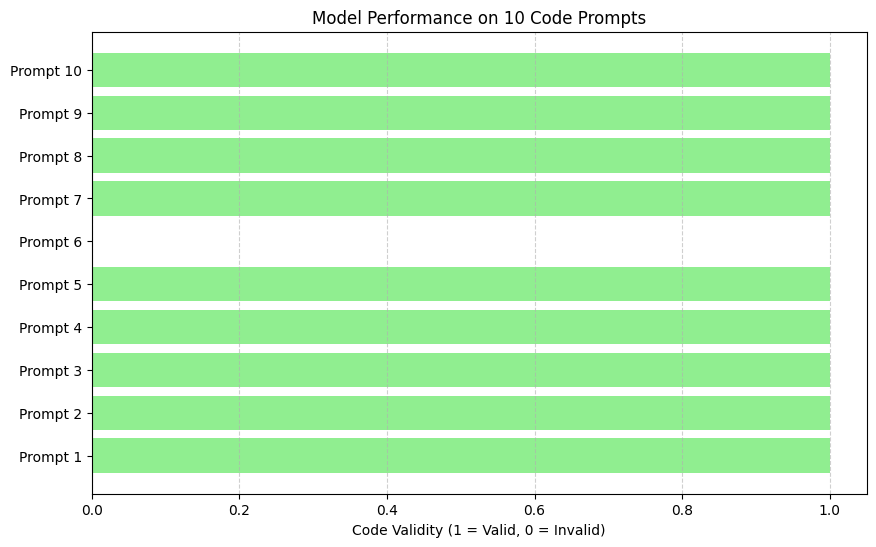


✅ Model generated valid Python code for 9 of 10 prompts.
📈 Accuracy: 90.0%


In [ ]:
# Second Interactive UI
!pip install transformers ipywidgets matplotlib accelerate --quiet

from transformers import pipeline
import matplotlib.pyplot as plt
import re
import torch
# 🔹 Visualization
plt.figure(figsize=(10, 6))
plt.barh(range(len(prompts)), scores, color='lightgreen')
plt.yticks(range(len(prompts)), [f"Prompt {i+1}" for i in range(len(prompts))])
plt.xlabel("Code Validity (1 = Valid, 0 = Invalid)")
plt.title("Model Performance on 10 Code Prompts")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

# 🔹 Summary
accuracy = sum(scores) / len(scores) * 100
print(f"\n✅ Model generated valid Python code for {sum(scores)} of {len(prompts)} prompts.")
print(f"📈 Accuracy: {accuracy:.1f}%")